In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

# Interpolation

So at this point, we now want to look at the following problem.  Suppose I give you some data in the form of a set of points

$$
\left\{x_{j},f_{j} \right\}_{j=0}^{n}
$$

where we think that $f_{j} = f(x_{j})$, which is to say, we think the data comes from a function $f(x)$, but we do not know the function $f(x)$.  Note, each point $x_{j}$ is called a _node_.  The question becomes, how might we find an approximation to $f(x)$?  As it turns out, there are an infinite number of ways to solve this problem, each with good and bad features.  The approach we will study first is called _ Lagrange Interpolation _.  

This method starts by deciding we are going to fit the data with an $n^{th}$ order polynomial, i.e. we choose a polynomial $P_{n}(x)$ of the form 

$$
P_{n}(x) = p_{0} + p_{1}x + \cdots + p_{n}x^{n},
$$

where the coefficients $p_{j}$ are found from the _ interpolation formulas _

$$
P_{n}(x_{j}) = f_{j}, ~ j=0,\cdots,n.
$$

As you can see, we have $n+1$ unknown coefficients $p_{j}$ and we have $n+1$ equations provided by the interpolation formulas.  Thus, we see that in principle we should be able to determine $P_{n}(x)$.  The advantage of having $P_{n}(x)$ is that anything else we want to know about $f(x)$, such as $f'(x)$ or $\int f(x)dx$, we can find by using $P_{n}(x)$.  

Now, there is another important way to think about $P_{n}(x)$.  While it is _ completely equivalent _ to what we have described above, it forms a very fundamental way to think about interpolation that comes up again and again in applied mathematics and numerical analysis.  In this approach, we write $P_{n}(x)$ as 

$$
P_{n}(x) = \sum_{j=0}^{n} f_{j}L_{j}^{(n)}(x),
$$

where the functions $L_{j}^{(n)}(x)$ are themselves $n^{th}$-order polynomials which are defined so that 

$$
L_{j}^{(n)}(x_{j}) = 1, ~ L_{j}^{(n)}(x_{k}) = 0, ~k\neq j. 
$$

We can see this idea illustrated in the figure below.  Here, we are interpolating through the data set

$$
\begin{array}{r|r}
x_{j} & f_{j}\\
\hline
-9 & 5\\
-4 & 2\\
-1 & -2\\
7 & 9
\end{array}
$$
![linterp](https://upload.wikimedia.org/wikipedia/commons/5/5a/Lagrange_polynomial.svg)

So,if we think about it, we ultimately see that we can find the $L^{(n)}_{j}(x)$ via the formula

$$
L_{j}^{(n)}(x) = \frac{\prod_{l\neq j}^{n}(x-x_{l})}{\prod_{l\neq j}^{n}(x_{j}-x_{l})}.
$$

We can motivate this result by looking at simple cases and working our way up.  So, suppose we let $n=1$.  In this case, we need to find two linear functions $L^{(1)}_{0}(x)$ and $L^{(1)}_{1}(x)$.  As we can readily see, in order to satisfy our requirements for these functions, we can just use

$$
L^{(1)}_{0}(x) = \frac{x-x_{1}}{x_{0}-x_{1}}, ~ L^{(1)}_{1}(x) = \frac{x-x_{0}}{x_{1}-x_{0}}.
$$

We clearly see in this case that 
$$
L^{(1)}_{0}(x_{0}) = 1, ~ L^{(1)}_{0}(x_{1}) = 0, ~~L^{(1)}_{1}(x_{0}) = 0, ~ L^{(1)}_{1}(x_{1}) = 1.
$$

Likewise, if we go to $n=2$, we need three different quadratic functions which, using either the formula or our intuition, we realize are 

$$
L^{(2)}_{0}(x) = \frac{(x-x_{1})(x-x_{2})}{(x_{0}-x_{1})(x_{0}-x_{2})}, ~ L^{(2)}_{1}(x) = \frac{(x-x_{0})(x-x_{2})}{(x_{1}-x_{0})(x_{1}-x_{2})}, ~ L^{(2)}_{2}(x) = \frac{(x-x_{0})(x-x_{1})}{(x_{2}-x_{1})(x_{2}-x_{1})}.
$$

So as we see, we can build $P_{n}(x)$ from the weighted $L^{(n)}_{j}(x)$ functions, which act as a _ basis _ for our interpolating polynomial.  The question then is, how can we numerically determine the functions $L^{(n)}_{j}(x)$.  This is done in the code below.   

In [4]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom
    return lval

In [5]:
def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly

If we try to recreate the example seen in the figure above, we use

Text(0, 0.5, '$P_{3}(x)$')

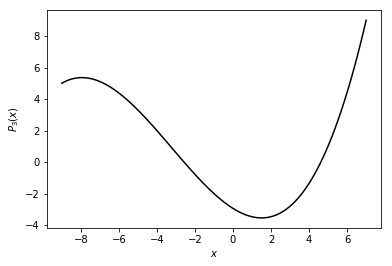

In [4]:
xvals = np.array([-9.,-4.,-1.,7.])
fvals = np.array([5.,2.,-2.,9.])
xinterp = np.linspace(-9.,7.,int(1e2))
ivals = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,ivals,color='k')
plt.xlabel('$x$')
plt.ylabel('$P_{3}(x)$')

and we see that we have recreated said example exactly.  Okay, good, we have working code.  However, we are now going to look at a classic example of what is called the _Runge Phenomena_, which in effect shows us that we cannot really go all that far with Lagrange interpolation if we insist on using equally spaced points. 

To see this, we let 

$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1.
$$

Now keep in mind, the more nodes I use in my interpolation scheme, the higher the degree polynomial I am obliged to use.  So suppose I use relatively few nodes, like only 10.  Then I get the following error plot for Lagrange interpolation.  

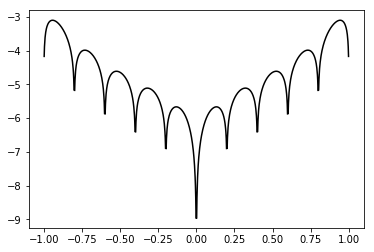

In [6]:
xinterp = np.linspace(-1.,1.,int(1e3)+1)
ftrue = 1./(1.+xinterp**2.)
xvals = xinterp[::100]
fvals = ftrue[::100]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

And if we double the number of points, aside from the fact that the error is several orders of magnitude larger at the right end point, overall, everything improves.  

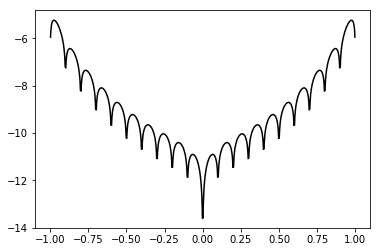

In [12]:
xvals = xinterp[::50]
fvals = ftrue[::50]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

So, at this point, we might imagine that more nodes means greater accuracy.  And that is in some sense true.  And if we double the number of points again, we get 

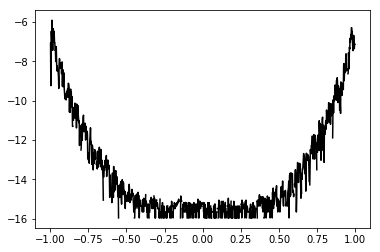

In [10]:
xvals = xinterp[::25]
fvals = ftrue[::25]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

So again, endpoints are problematic, but overall everything improved.  So if we keep adding nodes, then we should eventually be able to get to machine precision, right? Wrong.  

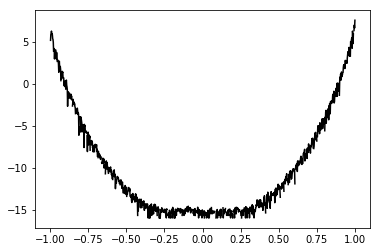

In [11]:
xvals = xinterp[::12]
fvals = ftrue[::12]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

As we see, more nodes actually made our approxmiation _worse_, not better.  Further, as we see, while we can achieve machine precision on the interior of our interpolation scheme, we cannot get anywhere close to that at the boundaries.  In order to get around this then, we might think of a different way to position nodes to address this issue.  Thus, we get motivate discussing clustered meshes.  

## Clustered Meshes

So, a way to get around the Runge Phenomena is to use unevenly spaced meshes of points.  To wit, we use what are called the Chebyshev points or nodes, which are given by 

$$
x_{j} = \cos\left(\frac{2j+1}{2n+2}\pi\right), ~ j=0,\cdots,n
$$

As we see below, by essentially clustering nodes at the endpoints of the interval we wish to interpolate over, we can remove the Runge Phenomena.  This incidentally is the beginning of a long conversation in numerical analysis we will not pursue further here.  

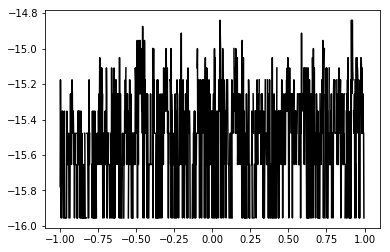

In [8]:
ncheb = 40
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = 1./(1.+xcheb**2.)
finterp = lagran_interp(xcheb,fcheb,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

## Linear Splines

Now we are going to try a very different approach to function approximation with what we did above with Lagrange Interpolation.  Instead of one global interpolating polynomial for given data $\left\{(x_{j},f_{j})\right\}^{N}_{j=0}$, we are going to use a piecewise defined function $S(x)$ where

$$
S(x) = \left\{ \begin{array}{rl} S_{0}(x) & x_{0}\leq x < x_{1} \\ S_{1}(x) & x_{1}\leq x < x_{2} \\ \vdots & \vdots \\ S_{n-1}(x) & x_{n-1}\leq x \leq x_{n} \end{array}\right.
$$

with the interpolation requirements

$$
S_{j}(x_{j}) = f_{j}, ~ j=0,\cdots,n-1, ~ S_{n-1}(x_{n}) = f_{n},
$$

and the continuity requirements at the interior points $\left\{x_{j}\right\}^{n-1}_{j=1}$

$$
S_{j}(x_{j+1}) = S_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2.
$$

By choosing $S_{j}(x) = m_{j}(x-x_{j}) + f_{j}$, this continuity requirement gives us that 

$$
m_{j}(x_{j+1}-x_{j}) + f_{j} = f_{j+1},
$$

or 

$$
m_{j} = \frac{f_{j+1}-f_{j}}{x_{j+1}-x_{j}}, ~ j=0,\cdots,n-1.
$$

To implement this then, we use the following code.

In [11]:
def linear_spline(xvals,fvals,xquery):
    npts = xvals.size
    qpts = xquery.size
    svals = np.zeros(qpts)
    # Precompute the slopes
    mvals = (fvals[1:]-fvals[:(npts-1)])/(xvals[1:]-xvals[:(npts-1)])
    # Now find the appropriate interval for each query point
    for ll in range(qpts):
        for jj in range(npts - 1):
            if xvals[jj]<=xquery[ll] and xquery[ll]<xvals[jj+1]:
                svals[ll] = mvals[jj]*(xquery[ll]-xvals[jj]) + fvals[jj]
                break
            svals[ll] = mvals[npts-2]*(xquery[ll]-xvals[npts-2]) + fvals[npts-2]

    return svals

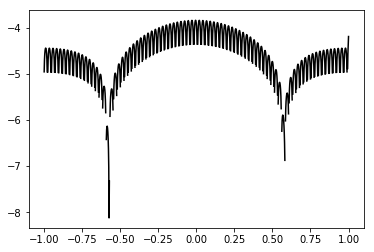

In [15]:
xquery = np.linspace(-1.,1.,int(1e3)+1)
ftrue = 1./(1.+xquery**2.)
xvals = xquery[::12]
fvals = ftrue[::12]
finterp = linear_spline(xvals,fvals,xquery)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

## Cubic Splines

So, while linear splines clearly work, they do not do so in a terribly efficient way.  To improve on this then, as before, we start our discussion with a data set 

$$
\left\{x_{j},f_{j}\right\}_{j=0}^{n}.
$$

We now define our _cubic splines_ $S_{j}(x)$ to be third order polynomials, i.e. 

$$
S_{j}(x) = a_{j}(x-x_{j})^{3} + b_{j}(x-x_{j})^{2} + c_{j}(x-x_{j}) + d_{j},
$$

such that 

\begin{align}
S_{j}(x_{j}) = & f_{j}, ~ j=0,\cdots,n-1\\
S_{j}(x_{j+1}) = & S_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S'_{j}(x_{j+1}) = & S'_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 \\
S''_{j}(x_{j+1}) = & S''_{j+1}(x_{j+1}), ~ j=0,\cdots,n-2 
\end{align}

which is to say, we require that we interpolate the data, and the each spline as as its first and second derivatives be continuous at each node.  Finally, we require that 

$$
S_{n-1}(x_{n}) = f_{n}, ~ S''_{0}(x_{0})=0, ~ S''_{n-1}(x_{n}) = 0.
$$

We readily see then that $d_{j}= f_{j}$.  Define 

$$
\delta x_{j} = x_{j+1} -x_{j}, ~ \delta f_{j} = f_{j+1} - f_{j}.
$$

Then from above we get the system of equations for  $j=0,\cdots,n-2$

\begin{align}
a_{j}(\delta x_{j})^{2} + b_{j}\delta x_{j} + c_{j} = & \frac{\delta f_{j}}{\delta x_{j}},\\
3a_{j}(\delta x_{j})^{2} + 2b_{j}\delta x_{j} + c_{j} = & c_{j+1},\\
3a_{j}\delta x_{j} + b_{j} = & b_{j+1} 
\end{align}

The end point conditions give us

$$
a_{n-1}\left(\delta x_{n-1}\right)^{2} + b_{n-1}\delta x_{n-1} + c_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}},
$$

and

$$
b_{0}=0, ~ 3a_{n-1}\delta x_{n-1} + b_{n-1} = 0.
$$

Solving for $a_{j}$ gives us, 

$$
a_{j} = \frac{1}{\delta x_{j}^{2}}\left(\frac{\delta f_{j}}{\delta x_{j}} - c_{j} - b_{j}\delta x_{j}\right), ~ j=0,\cdots,n-1,
$$

and in turn we then find that 

\begin{align}
3\frac{\delta f_{j}}{\delta x_{j}} - b_{j}\delta x_{j} - 2c_{j} = & c_{j+1}, ~ j=0,\cdots,n-2\\
3\frac{\delta f_{j}}{(\delta x_{j})^{2}} - 3\frac{c_{j}}{\delta x_{j}} - 2b_{j} = & b_{j+1}, ~j=0,\cdots,n-2,
\end{align}

and

$$
c_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{2}{3}\delta x_{n-1}b_{n-1}.
$$

Likewise, solving for $c_{j}$ then gives us

$$
c_{j} = \frac{\delta f_{j}}{\delta x_{j}} - \frac{\delta x_{j}}{3}\left( 2b_{j} + b_{j+1}\right), ~ j=0,\cdots,n-2.
$$

Ultimately then, we arrive at the system of equations, for $j=1,\cdots,n-3$, 

$$
\frac{\delta x_{j}}{3} b_{j} + \frac{2}{3}\left(\delta x_{j} + \delta x_{j+1} \right)b_{j+1} + \frac{\delta x_{j+1}}{3} b_{j+2} = \frac{\delta f_{j+1}}{\delta x_{j+1}} - \frac{\delta f_{j}}{\delta x_{j}},
$$

and

$$
\frac{2}{3}\left(\delta x_{0} + \delta x_{1} \right)b_{1} + \frac{\delta x_{1}}{3} b_{2} = \frac{\delta f_{1}}{\delta x_{1}} - \frac{\delta f_{0}}{\delta x_{0}},
$$

and

$$
\frac{\delta x_{n-2}}{3} b_{n-2} + \frac{2}{3}\left(\delta x_{n-2} + \delta x_{n-1} \right)b_{n-1} = \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{\delta f_{n-2}}{\delta x_{n-2}}.
$$

At this point, we should talk about solving the problem $A{\bf b}=\tilde{{\bf f}}$ where $A$ is a self-adjoint tridiagonal matrix.  In other words, defining the vectors ${\bf b}$ and $\tilde{{\bf f}}$ where

$$
{\bf b} = \begin{pmatrix} b_{1} \\ b_{2} \\ \vdots \\ b_{n-1} \end{pmatrix}, ~ \tilde{{\bf f}} = \begin{pmatrix} \frac{\delta f_{1}}{\delta x_{1}} - \frac{\delta f_{0}}{\delta x_{0}} \\ \frac{\delta f_{2}}{\delta x_{2}} - \frac{\delta f_{1}}{\delta x_{1}} \\ \vdots \\ \frac{\delta f_{n-1}}{\delta x_{n-1}} - \frac{\delta f_{n-2}}{\delta x_{n-2}}\end{pmatrix}
$$

we see that $A$ is an $(n-1)\times (n-1)$ symmetric ($A^{T}=A$) matrix where

$$
A = \begin{pmatrix} \frac{2}{3}(\delta x_{0} + \delta x_{1}) & \frac{1}{3}\delta x_{1} & &\\
\frac{1}{3}\delta x_{1} & \frac{2}{3}(\delta x_{1} + \delta x_{2}) & \frac{1}{3}\delta x_{2} &\\
 & & \ddots & & \\
 & & \frac{1}{3}\delta x_{n-3} & \frac{2}{3}(\delta x_{n-3} + \delta x_{n-2}) & \frac{1}{3}\delta x_{n-2}\\
 & & & \frac{1}{3}\delta x_{n-2} & \frac{2}{3}(\delta x_{n-2} + \delta x_{n-1})
\end{pmatrix}
$$

In code, we proceed as below.   

In [ ]:
def spline_maker(xvals,fvals,qvals):
    # m = fvals.size
    # note, from above, n = m-1
    
    n = fvals.size - 1
    df = fvals[1:]-fvals[0:n]
    dx = xvals[1:]-xvals[0:n]
    dfdx = df/dx
    svals = np.zeros(ivals.size)
    
    rhs = dfdx[1:] - dfdx[0:n-1]
    diag = 2./3.*(dx[1:] + dx[0:n-1])
    data = np.array([diag,dx[1:]/3.,dx[0:n-1]/3.])
    dvals = np.array([0,-1,1])
    Amat = spdiags(data, dvals, n-1, n-1)
    bvec = spsolve(Amat,rhs)
    
    bvec = np.append(0.,bvec)
    
    cvec = dfdx - 2./3.*dx*bvec - dx/3.*np.append(bvec[1:],0.)
    avec = (dfdx - dx*bvec - cvec)/(dx**2.)
    
    for jj in range(1,n+1):
        
        indsr = qvals < xvals[jj] 
        indsl = qvals >= xvals[jj-1]
        inds = indsl*indsr
        
        dxloc = qvals[inds] - xvals[jj-1]
        svals[inds] = avec[jj-1]*dxloc**3. + bvec[jj-1]*dxloc**2. + cvec[jj-1]*dxloc + fvals[jj-1]
        
    return svals

Revisiting the example from above in which 

$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$

we can now test our spline approximation scheme.  As we show, it can be very accurate, and while our arbitrary choice of enforcing zero curvature at the endpoints does cost us some amount of accuracy, we do not have anything resembling the problems we saw above with Lagrange interpolation.  Thus, splines offer us an accurate, efficient, and flexible means of interpolating data.  

In [ ]:
xvs = np.linspace(-1.,1.,int(1e3)+1)
fvs = 1./(1.+xvs**2.)
ivals = np.linspace(-.99,.99,int(5e3))
ftrue = 1./(1.+ivals**2.)

svals = spline_maker(xvs,fvs,ivals)
#plt.plot(ivals,svals,ls='-',color='k')
#plt.plot(ivals,ftrue,ls='--',color='r')
plt.plot(ivals,np.log10(np.abs(ftrue-svals)))

## Sparse Diagonal Matrices and Linear Algebra

Suppose I want to solve, the albeit, simple differential equation 

$$
T''(x) = f(x), ~ a < x < b, 
$$

with the _boundary conditions_ $T(a)=T_{l}$ and $T(b)=T_{r}$.  We can think of this problem as modelling the temperature of a long, narrow corridor with walls at $a$ and $b$ kept at a fixed temperature and $f(x)$ represents a heat source in the hall.  To solve this problem, we introduce a discretized mesh with $N+1$ points where 

$$
x_{j} = a + j\delta x, ~ \delta x = \frac{b-a}{N}, ~ j=0,\cdots,N.
$$

For the points $\left\{x_{j}\right\}_{j=1}^{N-1}$, we have the centered-difference approximations to the second derivative so that 

$$
T''(x_{j}) \approx \frac{1}{(\delta x)^{2}}\left(T_{j-1} - 2T_{j} + T_{j+1}\right), ~ j=1,\cdots,N-1.
$$

with the boundary conditions

$$
T_{0} = T_{l}, ~ T_{N} = T_{r}.
$$

If I then give you the data $\left\{f_{j}\right\}_{j=1}^{N-1}$ where $f_{j}=f(x_{j})$, then we get the following linear algebra problem 

$$
\frac{1}{(\delta x)^{2}}\begin{pmatrix} -2 & 1 & &\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 & & & 1 & -2
\end{pmatrix} \begin{pmatrix} T_{1} \\ T_{2} \\ \vdots \\ T_{N-2} \\ T_{N-1}\end{pmatrix} = \begin{pmatrix} f_{1} - \frac{u_{l}}{(\delta x)^{2}} \\ f_{2} \\ \vdots \\ f_{N-2} \\ f_{N-1} - \frac{u_{r}}{(\delta x)^{2}} \end{pmatrix}
$$

Using the code fragment below, write a program that finds $T$ given $a$, $b$, $N$, $f$, $u_{l}$, and $u_{r}$.

In [ ]:
def temp_find(a,b,Nvls,f,ul,ur):
    Nint = int(Nvls)
    xnodes = np.linspace(a,b,Nint+1)
    fnodes = f(xnodes)
    dx = (b-a)/Nvls
    idx2 = 1./(dx*dx)
    
    # Build the right-hand side of your problem 
    rhs = fnodes[1:Nint]
    rhs[0] -= ul*idx2 # include left-side boundary condition 
    rhs[Nint-2] -= ur*idx2 # include right-side boundary condition
    
    # Take it away.  Use the code from the cubic spline implementation to help you proceed.  